In [10]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
import os
from math import floor

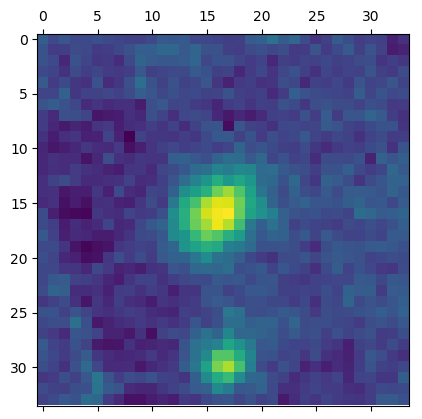

In [11]:
files = os.listdir('./spectra/')
#print(files)
file = files[2]
hdu_list = fits.open('./spectra/' + file)
cube = hdu_list[0].data
image = np.sum(cube, axis=0)

plt.matshow(image)
plt.show()

1234.6431691646576


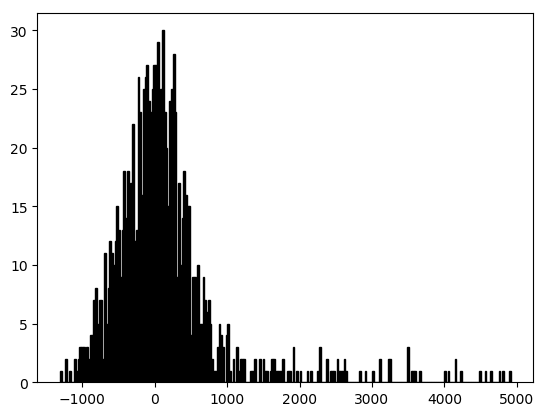

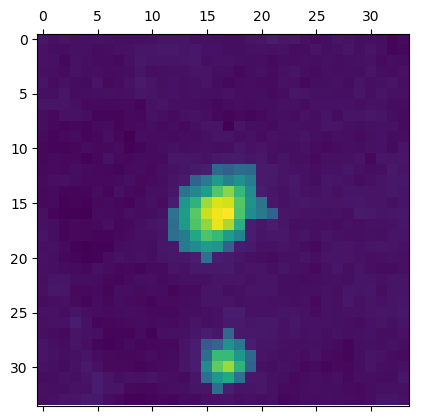

In [12]:
from skimage.filters import threshold_otsu

plt.hist(image.ravel(), bins=256, fc='k', ec='k')
threshold = threshold_otsu(image)
print(threshold)
galaxy_shape = image > threshold
plt.matshow(np.multiply(image, (galaxy_shape + 0.2)))
plt.show()

(16, 17)
5.831520663048867
3.605551275463989
[2.23606798]


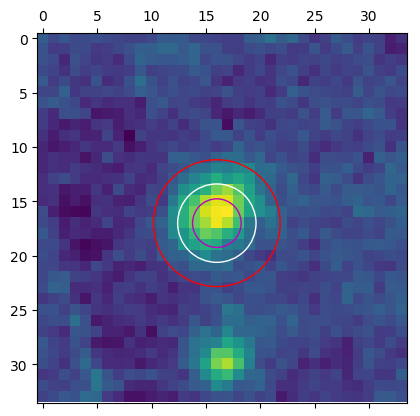

In [13]:
from scipy.spatial import distance
from scipy.stats import mode
from statistics import median

center = np.unravel_index(np.argmax(image), image.shape)
print(center)
avg_dist = 0
count = 0
distances = []
for index, x in np.ndenumerate(galaxy_shape):
    if x != 1:
        continue
    count += 1
    dist = distance.euclidean(center, index)
    distances.append(dist)
    avg_dist += dist
    
    
avg_dist /= count
med_dist = median(distances)
mod_dist, _ = mode(distances)
print(avg_dist)
print(med_dist)
print(mod_dist)

from matplotlib.patches import Circle
ax = plt.subplot(111)
circle_avg = Circle(center, avg_dist, fill=False, edgecolor='r')
circle_med = Circle(center, med_dist, fill=False, edgecolor='w')
circle_mod = Circle(center, mod_dist, fill=False, edgecolor='m')

ax.matshow(image)
ax.add_patch(circle_avg)
ax.add_patch(circle_med)
ax.add_patch(circle_mod)

plt.show()

##### 